In [2]:
import numpy as np
from scipy.misc import imread as im
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix as CM
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
import os
from collections import Counter
%matplotlib inline

# Outlier Detection
## L1 norm

In [3]:
norms = ['L1RGAN', 'L21RGAN', 'L21STRGAN']

In [9]:
## edit this to the result folder
folder = "/".join([os.getcwd(),"train_logs/anomaly_detection/{}/".format(norms[0])])
print(folder)
lamda = np.arange(0.00035, 0.0015, 0.0001)
print(lamda)
lam_list = sorted(map(lambda x: float(x[3:]), filter(lambda x: '0.' in x, os.listdir(folder))))
print(lam_list)

/home/vanmao_ngo/AnomalyDetection/RobustGAN/train_logs/anomaly_detection/L1RGAN/
[0.00035 0.00045 0.00055 0.00065 0.00075 0.00085 0.00095 0.00105 0.00115
 0.00125 0.00135 0.00145]
[35.0, 45.0, 65.0, 75.0, 105.0, 115.0, 125.0, 135.0, 145.0, 5499999999999999.0, 8500000000000001.0, 9500000000000000.0]


In [6]:
y = np.load(r"./data/y.npk", allow_pickle=True)
stat = Counter(y)
print("number of majority:", stat[4])
print("number of outlier:", len(y) - stat[4])
print("outlier ratio:", (len(y) - stat[4])/float(stat[4]))

number of majority: 4859
number of outlier: 265
outlier ratio: 0.05453797077587981


In [24]:
def binary_error(value):
    if value != 0.0:
        return "o" # 'majority'
    else:
        return "m" #'outlier'
    
def binary_y(value):
    if value == 4:
        return "m"
    else:
        return "o"

bi_y = list(map(binary_y,y))
print(Counter(bi_y))

Counter({'m': 4859, 'o': 265})


In [6]:
a=[1.0,2.0,3.1,4.2,5.,6.1]
a=np.asarray(a)
b=a[a-3 < 1]
print(b)

[1.  2.  3.1]


In [14]:
a = np.array([[1, 2, 3, 4], [2.3,4.3,6.7,3.4], [3.2,1.2,3.3,5.4]])
b = np.array([[0.1, 0.3,0.4, 0.3], [1.2, 2.3, 0.2, 0.9],[2.3, 3.2, 2.1, 1.7]]) 
c= a -b
print(c)
print("a.shape={}, b.shape={}, c.shape={}".format(a.shape, b.shape, c.shape))
l1c_1 = [np.linalg.norm(c[i], 1) for i in range(c.shape[0])]
l1c_2 = np.sum(np.abs(c), axis=-1)
%timeit l1c_1 = [np.linalg.norm(c[i], 1) for i in range(c.shape[0])]
%timeit l1c_2 = np.sum(np.abs(c), axis=-1)
l2_c = np.sum(np.abs(c)**2, axis=-1)**(1./2)
print(l2_c)
print("l1c_1={}, l1c_2={}".format(l1c_1, l1c_2))


[[ 0.9  1.7  2.6  3.7]
 [ 1.1  2.   6.5  2.5]
 [ 0.9 -2.   1.2  3.7]]
a.shape=(3, 4), b.shape=(3, 4), c.shape=(3, 4)
The slowest run took 5.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.6 µs per loop
The slowest run took 7.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.44 µs per loop
[4.91426495 7.32871066 4.46542271]
l1c_1=[8.9, 12.1, 7.8], l1c_2=[ 8.9 12.1  7.8]


In [15]:
np.sqrt(0.9**2+1.7**2+2.6**2+3.7**2)

4.914264950122246

In [25]:
precisions=[]
lams=[]
recalls=[]
f1s = []
for i,lam in enumerate(lam_list):
    S = np.load(folder + "/" + "lam" + str(lam) + "/" + r"l21S.npk", encoding='latin1', allow_pickle=True)    
    predictions = list(map(binary_error,np.linalg.norm(S,axis = 1)))
    p = precision(bi_y, predictions, labels=["o","m"],pos_label="o")
    r = recall(bi_y,predictions,labels=["o","m"],pos_label="o")
    f1 = f1_score(bi_y,predictions,labels=["o","m"],pos_label="o")
    print("lambda:", lam)
    print("stat:", Counter(predictions))
    print("precision",p)
    print("recall",r)
    print("f1",f1)
    lams.append(lam)
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)
#     print CM(bi_y,predictions)
    print("------------")
print(len(lams),len(recalls),len(f1s),len(precisions))

lambda: 0.00035
stat: Counter({'o': 5082, 'm': 42})
precision 0.0521448248720976
recall 1.0
f1 0.09912100243126987
------------
lambda: 0.00045
stat: Counter({'o': 4200, 'm': 924})
precision 0.06285714285714286
recall 0.9962264150943396
f1 0.11825307950727884
------------
lambda: 0.00055
stat: Counter({'o': 2652, 'm': 2472})
precision 0.09653092006033183
recall 0.9660377358490566
f1 0.17552279739458349
------------
lambda: 0.00065
stat: Counter({'m': 3740, 'o': 1384})
precision 0.17052023121387283
recall 0.8905660377358491
f1 0.2862340812613705
------------
lambda: 0.00075
stat: Counter({'m': 4459, 'o': 665})
precision 0.3233082706766917
recall 0.8113207547169812
f1 0.4623655913978495
------------
lambda: 0.00085
stat: Counter({'m': 4769, 'o': 355})
precision 0.5464788732394367
recall 0.7320754716981132
f1 0.6258064516129033
------------
lambda: 0.00095
stat: Counter({'m': 4904, 'o': 220})
precision 0.75
recall 0.6226415094339622
f1 0.6804123711340205
------------
lambda: 0.00105
stat:

0.665280665281


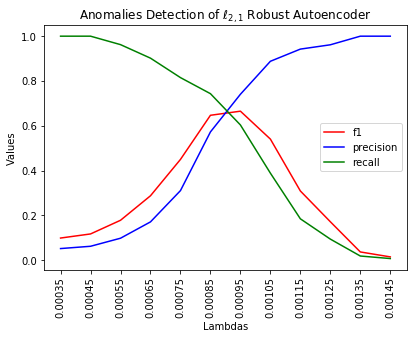

In [6]:
print np.max(f1s)
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Lambdas")
plt.ylabel("Values")
plt.plot(range(len(lams)),f1s,color='r',label="f1")
plt.plot(range(len(lams)),precisions,color="b",label="precision")
plt.plot(range(len(lams)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(lams)), lam_list,rotation='vertical')
plt.title("Anomalies Detection of $\ell_{2,1}$ Robust Autoencoder")
plt.show()

In [15]:
y_r = np.array([0, 1,1,1,1,0])
y_p = np.array([0, 1, 0,1,1,0])
f1 = f1_score(y_r, y_p)
print(f1)
tn, fp, fn, tp = CM(y_r, y_p).ravel()
print("tn={}, fp={},fn={},tp={}, accuracy={}, recall={}, precision={},F1={}".
    format(tn, fp, fn, tp, (tp+tn)/(tn+tp+fp+fn), tp/(tp+fn), tp/(tp+fp), 2*tp/(2*tp+fp+fn)))

0.8571428571428571
tn=2, fp=0,fn=1,tp=3, accuracy=0.8333333333333334, recall=0.75, precision=1.0,F1=0.8571428571428571


0.6804123711340205


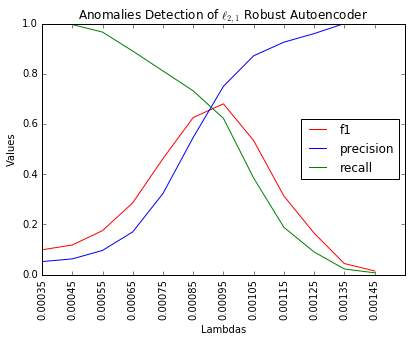

In [27]:
print(np.max(f1s))
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Lambdas")
plt.ylabel("Values")
plt.plot(range(len(lams)),f1s,color='r',label="f1")
plt.plot(range(len(lams)),precisions,color="b",label="precision")
plt.plot(range(len(lams)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(lams)), lam_list,rotation='vertical')
plt.title("Anomalies Detection of $\ell_{2,1}$ Robust Autoencoder")
plt.show()

## Plot the S and L

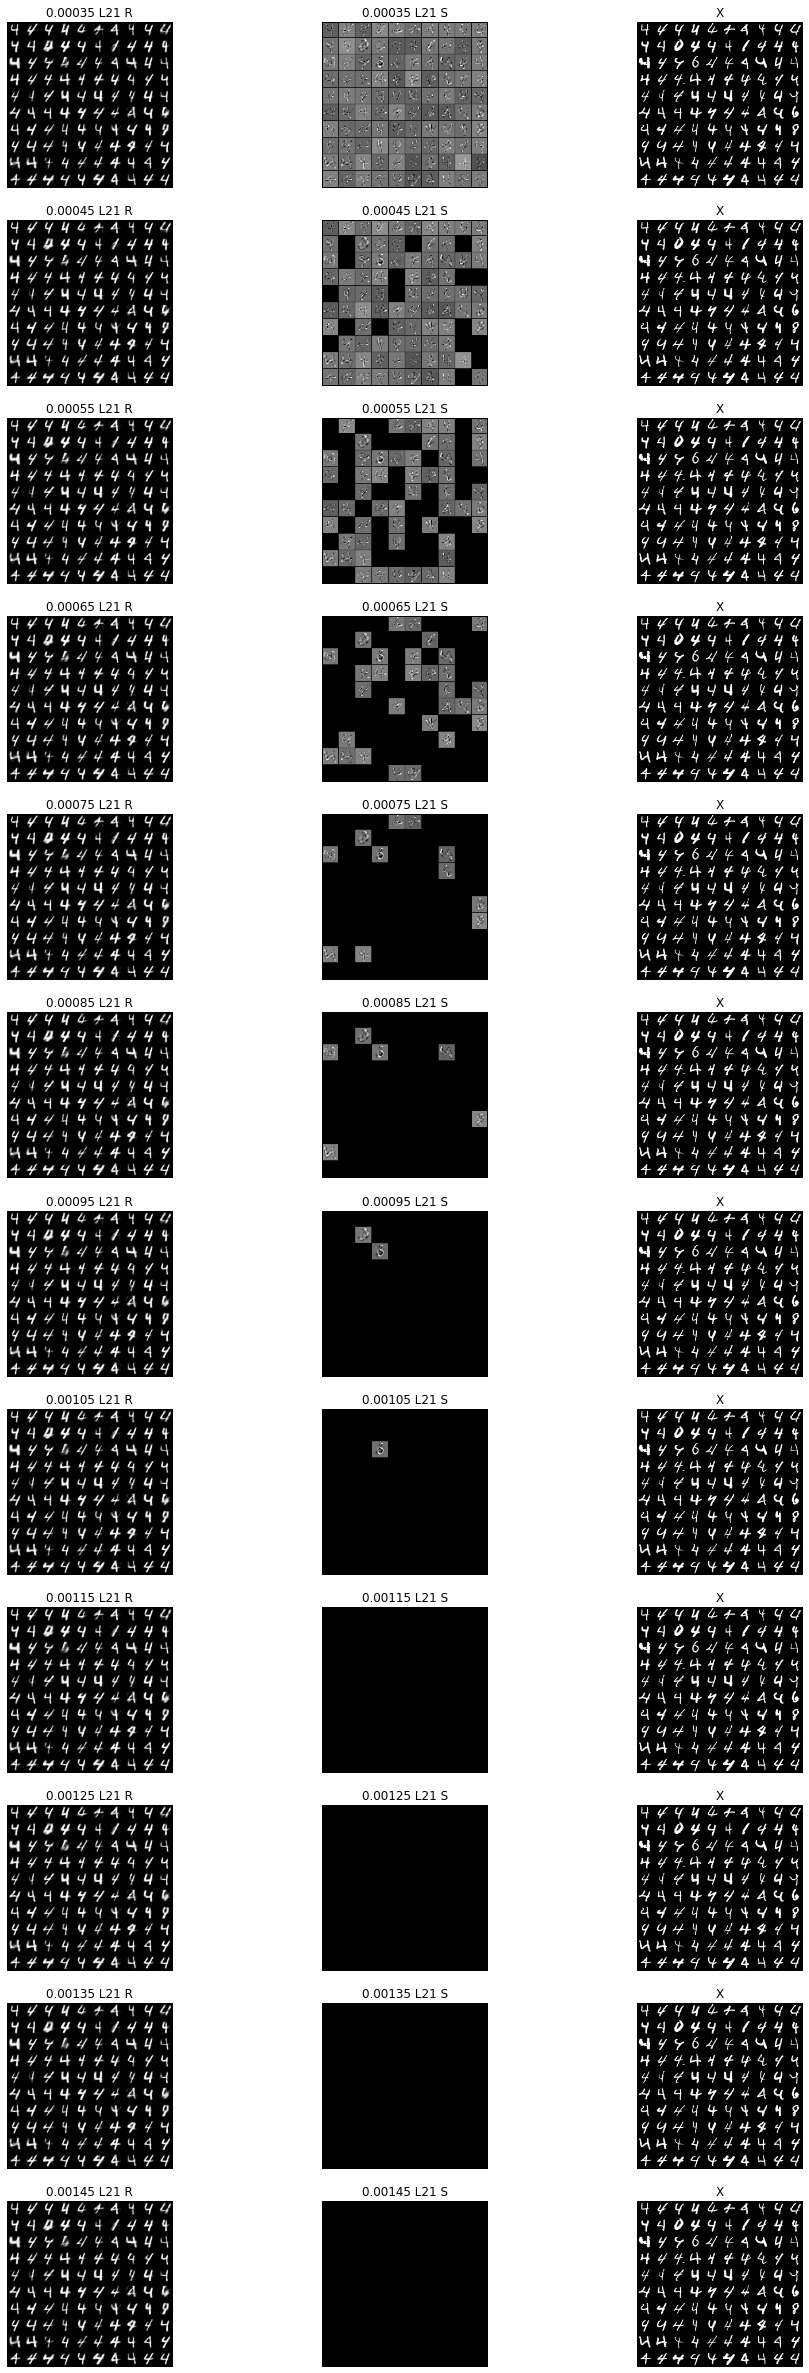

In [28]:
%matplotlib inline
ncol = 3
folder_cor = folder + "/" ##+corruption_level_folder[-2]
fig,ax = plt.subplots(nrows=len(lam_list),ncols=ncol)
X = im(folder_cor + "/" +r"X.png")
for index in range(len(lam_list)):
    l21R = im(folder_cor + "/" + "lam" +str(lam_list[index])+ "/" + r"l21R.png")
    l21S = im(folder_cor + "/" + "lam" +str(lam_list[index])+ "/" + r"l21S.png")
    
    ax[index][0].imshow(l21R,cmap = "gray")
    ax[index][1].imshow(l21S,cmap = "gray")
    ax[index][2].imshow(X,cmap = "gray")
    
    ax[index][0].set_title(str(lam_list[index])+r" L21 R")
    ax[index][1].set_title(str(lam_list[index])+r" L21 S")
    ax[index][2].set_title("X")
    ax[index][0].get_xaxis().set_visible(False)
    ax[index][0].get_yaxis().set_visible(False)
    ax[index][1].get_xaxis().set_visible(False)
    ax[index][1].get_yaxis().set_visible(False)
    ax[index][2].get_xaxis().set_visible(False)
    ax[index][2].get_yaxis().set_visible(False)
    
fig.set_size_inches(16,(len(lam_list))*3.5)
#fig.savefig(r"C:\Users\zc\Desktop\Result\Comparing.png",bbox_inches='tight')
plt.show()

# Benchmark Methods

## Isolation Forest

In [8]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
x = np.load(r"./data/data.npk")
print x.shape
def binary_y(value):
    if value == 4:
        return 1
    else:
        return -1
bi_y = map(binary_y,y)

(5124, 784)


In [10]:
fractions = np.arange(0.01,0.4,0.01)
y_preds = []
precisions=[]
fraction_list=[]
recalls=[]
f1s = []
for fraction in fractions:
    #model = EllipticEnvelope(contamination = fraction)
    model = IsolationForest(n_estimators=1000,contamination=fraction,n_jobs=6)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)
    
    p = precision(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    r = recall(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    f1 = f1_score(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    print "fraction",fraction
    print "precision", p
    print "recall", r
    print "f1", f1
    print "------------"
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)

fraction 0.01
precision 0.692307692308
recall 0.135849056604
f1 0.227129337539
------------
fraction 0.02
precision 0.553398058252
recall 0.215094339623
f1 0.309782608696
------------
fraction 0.03
precision 0.448051948052
recall 0.260377358491
f1 0.329355608592
------------
fraction 0.04
precision 0.419512195122
recall 0.324528301887
f1 0.365957446809
------------
fraction 0.05
precision 0.373540856031
recall 0.362264150943
f1 0.367816091954
------------
fraction 0.06
precision 0.340909090909
recall 0.396226415094
f1 0.366492146597
------------
fraction 0.07
precision 0.314763231198
recall 0.42641509434
f1 0.362179487179
------------
fraction 0.08
precision 0.29512195122
recall 0.456603773585
f1 0.358518518519
------------
fraction 0.09
precision 0.279220779221
recall 0.48679245283
f1 0.354883081155
------------
fraction 0.1
precision 0.263157894737
recall 0.509433962264
f1 0.347043701799
------------
fraction 0.11
precision 0.255319148936
recall 0.543396226415
f1 0.347406513872
-----

Max F1-score 0.367816091954


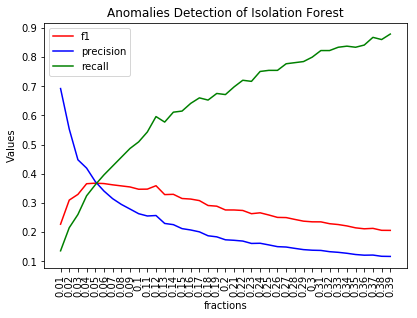

In [11]:
print "Max F1-score", np.max(f1s)
plt.close('all')
plt.figure(figsize=(6.5,4.5))
plt.xlabel("fractions")
plt.ylabel("Values")
plt.plot(range(len(fractions)),f1s,color='r',label="f1")
plt.plot(range(len(fractions)),precisions,color="b",label="precision")
plt.plot(range(len(fractions)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fractions)), fractions,rotation='vertical')
plt.title("Anomalies Detection of Isolation Forest")
plt.show()

## OneClass SVM

In [15]:
from sklearn.svm import OneClassSVM

In [16]:
fractions = np.arange(0.01,0.4,0.01)
y_preds = []
recalls=[]
f1s = []
precisions=[]
for fraction in fractions:
    model = OneClassSVM(nu=fraction)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)
    p = precision(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    r = recall(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    f1 = f1_score(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    print "fraction",fraction
    print "precision", p
    print "recall", r
    print "f1", f1
    print "------------"
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)

fraction 0.01
precision 0.5625
recall 0.101886792453
f1 0.172523961661
------------
fraction 0.02
precision 0.5
recall 0.192452830189
f1 0.277929155313
------------
fraction 0.03
precision 0.487012987013
recall 0.283018867925
f1 0.35799522673
------------
fraction 0.04
precision 0.456730769231
recall 0.358490566038
f1 0.401691331924
------------
fraction 0.05
precision 0.431906614786
recall 0.418867924528
f1 0.425287356322
------------
fraction 0.06
precision 0.419141914191
recall 0.479245283019
f1 0.447183098592
------------
fraction 0.07
precision 0.387640449438
recall 0.520754716981
f1 0.444444444444
------------
fraction 0.08
precision 0.371980676329
recall 0.581132075472
f1 0.453608247423
------------
fraction 0.09
precision 0.353448275862
recall 0.618867924528
f1 0.449931412894
------------
fraction 0.1
precision 0.330078125
recall 0.637735849057
f1 0.435006435006
------------
fraction 0.11
precision 0.3074204947
recall 0.656603773585
f1 0.418772563177
------------
fraction 0.12


Max F1-score 0.453608247423


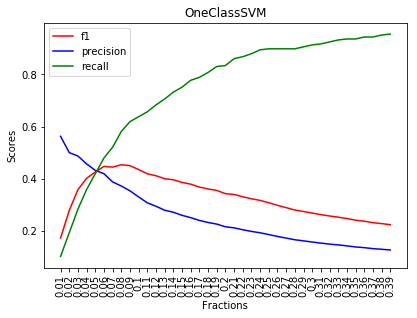

In [17]:
print "Max F1-score", np.max(f1s)
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Fractions")
plt.ylabel("Scores")
plt.plot(range(len(fractions)),f1s,color='r',label="f1")
plt.plot(range(len(fractions)),precisions,color="b",label="precision")
plt.plot(range(len(fractions)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fractions)), fractions,rotation='vertical')
plt.title("OneClassSVM")
plt.show()